In [165]:
import pandas as pd

In [166]:
menu_path = ("F:\Data Analysis - Python\Restaurants Analysis\menu_items.csv")
orders_path = ("F:\Data Analysis - Python\Restaurants Analysis\order_details.csv")

menu = pd.read_csv(menu_path)
orders = pd.read_csv(orders_path)
                    #  parse_dates=["order_date"])

data_list = [menu, orders]

for data in data_list:
    print(data.head(5))
    print("*"*100)

   menu_item_id      item_name  category  price
0           101      Hamburger  American  12.95
1           102   Cheeseburger  American  13.95
2           103        Hot Dog  American   9.00
3           104  Veggie Burger  American  10.50
4           105   Mac & Cheese  American   7.00
****************************************************************************************************
   order_details_id  order_id order_date   order_time  item_id
0                 1         1     1/1/23  11:38:36 AM    109.0
1                 2         2     1/1/23  11:57:40 AM    108.0
2                 3         2     1/1/23  11:57:40 AM    124.0
3                 4         2     1/1/23  11:57:40 AM    117.0
4                 5         2     1/1/23  11:57:40 AM    129.0
****************************************************************************************************


<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\User\AppData\Local\Temp\ipykernel_6128\3228743240.py:1: SyntaxWarning: invalid escape sequence '\D'
  menu_path = ("F:\Data Analysis - Python\Restaurants Analysis\menu_items.csv")
C:\Users\User\AppData\Local\Temp\ipykernel_6128\3228743240.py:2: SyntaxWarning: invalid escape sequence '\D'
  orders_path = ("F:\Data Analysis - Python\Restaurants Analysis\order_details.csv")


In [167]:
# exploring the data

data_list = [menu, orders]

for data in data_list:
    print(data.head(5))
    print("*"*100)
    print("Data Shape")
    print(data.shape)
    print("*"*100)
    print("Data Information")
    print(data.info())
    print("*"*100)
    print("Data Numericals")
    print(data.describe())

   menu_item_id      item_name  category  price
0           101      Hamburger  American  12.95
1           102   Cheeseburger  American  13.95
2           103        Hot Dog  American   9.00
3           104  Veggie Burger  American  10.50
4           105   Mac & Cheese  American   7.00
****************************************************************************************************
Data Shape
(32, 4)
****************************************************************************************************
Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   menu_item_id  32 non-null     int64  
 1   item_name     32 non-null     object 
 2   category      32 non-null     object 
 3   price         32 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB
None
***********************************************

In [168]:
# dealing with missing values

orders.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 12097 entries, 0 to 12233
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  12097 non-null  int64  
 1   order_id          12097 non-null  int64  
 2   order_date        12097 non-null  object 
 3   order_time        12097 non-null  object 
 4   item_id           12097 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 567.0+ KB


In [169]:
# joining the orders and menu tables together

restaurant_df = orders.merge(menu, how = "left", left_on= "item_id", right_on ="menu_item_id").drop("menu_item_id", axis=1)
restaurant_df.head(2)

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price
0,1,1,1/1/23,11:38:36 AM,109.0,Korean Beef Bowl,Asian,17.95
1,2,2,1/1/23,11:57:40 AM,108.0,Tofu Pad Thai,Asian,14.50


In [170]:
# adding the sales tax column

restaurant_df['sales_tax'] = (restaurant_df.price * 0.08).round(2)
restaurant_df['total_revenue'] = restaurant_df.price + restaurant_df.sales_tax

restaurant_df.tail(2)

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price,sales_tax,total_revenue
12232,12233,5369,3/31/23,10:05:04 PM,122.0,Chips & Salsa,Mexican,7.0,0.56,7.56
12233,12234,5370,3/31/23,10:15:48 PM,122.0,Chips & Salsa,Mexican,7.0,0.56,7.56


In [171]:
# creating the timestamp column

restaurant_df['order_timestamp'] = pd.to_datetime(restaurant_df['order_date'] + ' ' + restaurant_df['order_time'], 
                                                  format='%m/%d/%y %I:%M:%S %p')

restaurant_df.head(2)



,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price,sales_tax,total_revenue,order_timestamp
0,1,1,1/1/23,11:38:36 AM,109.0,Korean Beef Bowl,Asian,17.95,1.44,19.39,2023-01-01 11:38:36
1,2,2,1/1/23,11:57:40 AM,108.0,Tofu Pad Thai,Asian,14.50,1.16,15.66,2023-01-01 11:57:40


In [172]:
# dropping the order date and order time columns
# restaurant_data = restaurant_df.drop(["order_date","order_time"], axis=1, inplace=True)

# Dropping 'order_date' and 'order_time' in place (direct modification of restaurant_df)
if 'order_date' in restaurant_df.columns and 'order_time' in restaurant_df.columns:
    restaurant_df.drop(["order_date", "order_time"], axis=1, inplace=True)
else:
    print("Columns 'order_date' or 'order_time' do not exist in the DataFrame.")

# viewing the data
restaurant_df.head(2)

,order_details_id,order_id,item_id,item_name,category,price,sales_tax,total_revenue,order_timestamp
0,1,1,109.0,Korean Beef Bowl,Asian,17.95,1.44,19.39,2023-01-01 11:38:36
1,2,2,108.0,Tofu Pad Thai,Asian,14.50,1.16,15.66,2023-01-01 11:57:40


# Needed Insights
1. Which items drive the most revenue?
2. Which time periods have the highest and lowest revenue?
3. AoB


<Axes: ylabel='item_name'>

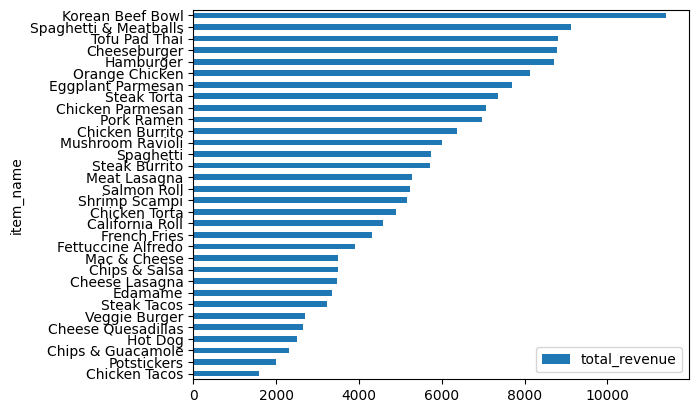

In [173]:
# aggregating the data for question 1

(restaurant_df
 .groupby('item_name')
 .agg({"total_revenue":"sum"})
 .sort_values("total_revenue")
 .plot
 .barh()
)

<Axes: xlabel='item_name'>

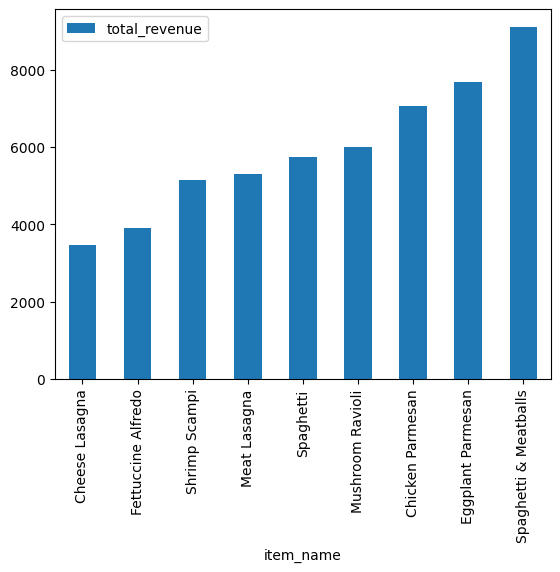

In [174]:
# querying for dishes that are italian
# aggregating the data for question 1

(restaurant_df
 .query("category=='Italian'")
 .groupby('item_name')
 .agg({"total_revenue":"sum"})
 .sort_values("total_revenue")
 .plot
 .bar()
)

In [175]:
restaurant_df.columns

Index(['order_details_id', 'order_id', 'item_id', 'item_name', 'category',
       'price', 'sales_tax', 'total_revenue', 'order_timestamp'],
      dtype='object')

<Axes: xlabel='order_timestamp'>

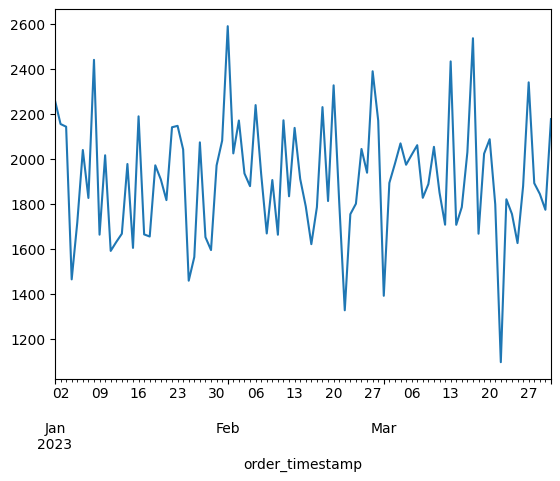

In [176]:
#Analyzing busiest days
#comparing line charts with heatmaps
"""
- This will take three or four steps to actualize
- Time series aggregations
- Creating new columns
- Doing a pivot table
- Creating a heatmap
- Customizign the heatmap
"""

#line chart
restaurant_df.set_index('order_timestamp').resample("D")["total_revenue"].sum().plot()


In [177]:
#creating the heatmap
#reate hour and day columns

restaurant_df['dayofweek'] = restaurant_df.order_timestamp.dt.dayofweek
restaurant_df['hour'] = restaurant_df.order_timestamp.dt.hour

restaurant_df.head(2)

,order_details_id,order_id,item_id,item_name,category,price,sales_tax,total_revenue,order_timestamp,dayofweek,hour
0,1,1,109.0,Korean Beef Bowl,Asian,17.95,1.44,19.39,2023-01-01 11:38:36,6,11
1,2,2,108.0,Tofu Pad Thai,Asian,14.50,1.16,15.66,2023-01-01 11:57:40,6,11


In [178]:
# creating pivot table
restaurant_df.pivot_table(

    index ='hour',
    columns ='dayofweek',
    values = 'total_revenue',
    aggfunc = 'sum'
)

dayofweek,0,1,2,3,4,5,6
hour,,,,,,,
10,NaN,NaN,NaN,36.13,NaN,32.30,NaN
11,1301.70,927.05,1201.31,1534.83,1161.11,1351.82,1295.76
12,4140.33,2118.44,2005.69,3620.37,4036.26,3814.77,3723.66
13,3485.13,2107.75,2164.73,3141.56,4014.76,2856.21,4524.79
14,1564.97,1903.19,2010.10,1837.02,2088.30,1991.64,2231.88
15,1341.46,1783.21,1705.90,1388.44,1458.24,1165.96,1746.69
16,1847.87,2309.06,2668.19,2407.43,2212.55,1597.46,1768.29
17,2961.90,2494.85,2552.63,2920.02,2849.34,2521.67,3001.61
18,2991.99,3015.99,2342.69,2471.70,2119.62,2728.58,2542.57


<Axes: xlabel='dayofweek', ylabel='hour'>

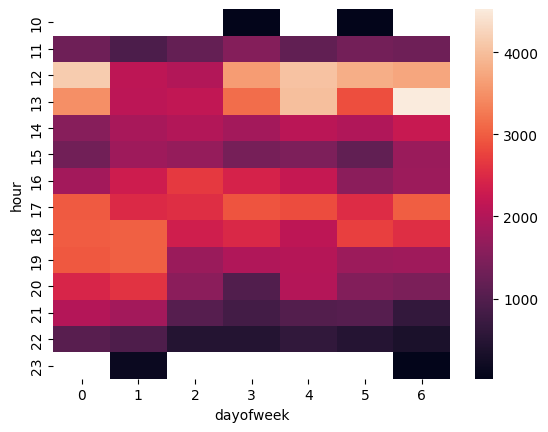

In [179]:
#creating the heatmap
import seaborn as sb

sb.heatmap(
   restaurant_df.pivot_table(

    index ='hour',
    columns ='dayofweek',
    values = 'total_revenue',
    aggfunc = 'sum'
    ) 
)

<Axes: xlabel='dayofweek', ylabel='hour'>

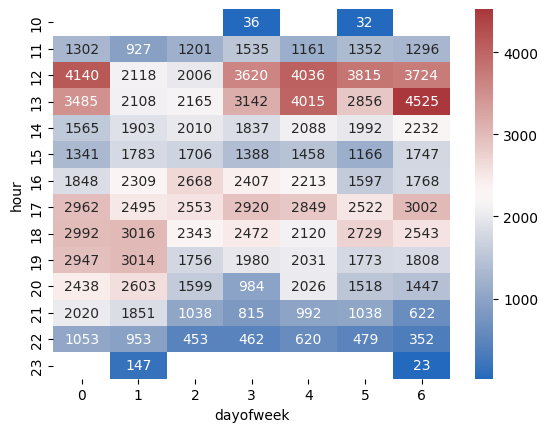

In [180]:
sb.heatmap(
    restaurant_df.pivot_table(

        index ='hour',
        columns ='dayofweek',
        values = 'total_revenue',
        aggfunc = 'sum'
        ).round(),
    annot = True,
    fmt = "g",
    cmap = "vlag"

)

## Insights gotten from analysis
1. It is not worth opening our shop during anomaly hours (before 10a.m. and after 10p.m.), since the sales are significantly lower
2. Apart from Monday and Tuenday, we should consider closing shop at 9p.m. since there are not as much revenue
3. For Sunday, we can close the shop at 8p.m. 

- Code written by: Vincent Muiruri
- Date written: 16th October 2023
- Signature: V.M.M.